In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def regression_analysis(data_path):
    data = pd.read_csv(data_path)
    data.columns = [x.replace(' ', '_') for x in data.columns]
#     vc = {'Country': '0 + C(Country)'}
    md = smf.mixedlm('Price_Index ~ date + C8_International_travel_controls_org + log_cases_org + log_death_org + log_cases_dst + log_death_dst',
                     
                re_formula='~C8_International_travel_controls_org', data=data, groups='Country')
    mdf = md.fit(method=["lbfgs"])
    print(mdf.summary())
    
    return mdf

In [9]:
mdf = regression_analysis('../data/processed/import_policy.csv')

                             Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             Price_Index
No. Observations:               112                 Method:                         REML       
No. Groups:                     4                   Scale:                          104.7557   
Min. group size:                28                  Log-Likelihood:                 -417.2655  
Max. group size:                28                  Converged:                      Yes        
Mean group size:                28.0                                                           
-----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025  0.975]
-----------------------------------------------------------------------------------------------
Intercept                                          115.499   11.003 1

/Users/wenqianzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/wenqianzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2711: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [11]:
re_df = pd.DataFrame(mdf.random_effects).T

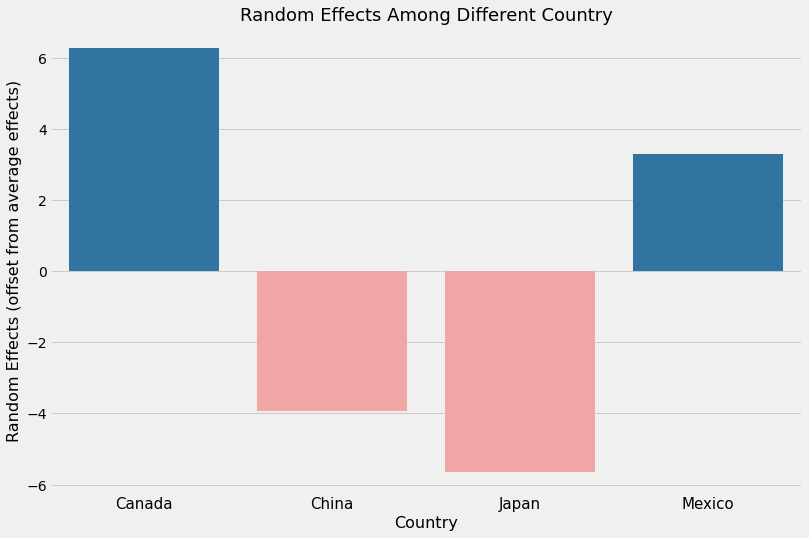

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(12, 8))
sns.barplot(x=re_df.index, y=re_df['C8_International_travel_controls_org'], 
            palette=[sns.color_palette("Paired")[1], sns.color_palette("Paired")[4], sns.color_palette("Paired")[4],
                  sns.color_palette("Paired")[1]])
plt.title("Random Effects Among Different Country", fontsize=18)
g = plt.xticks(fontsize=15)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Random Effects (offset from average effects)", fontsize=16)
plt.savefig('../images/re_viz.png', dpi=300, bbox_inches='tight')

In [2]:
data = pd.read_csv('../data/processed/import_policy.csv')

In [3]:
data['Price Index'].describe()

count    112.000000
mean     120.002679
std       25.934503
min       96.400000
25%       98.300000
50%      105.450000
75%      133.350000
max      207.400000
Name: Price Index, dtype: float64

In [4]:
data

,Country,Price Index,month,C1_School closing_org,C2_Workplace closing_org,C3_Cancel public events_org,C4_Restrictions on gatherings_org,C5_Close public transport_org,C6_Stay at home requirements_org,C7_Restrictions on internal movement_org,...,C5_Close public transport_dst,C6_Stay at home requirements_dst,C7_Restrictions on internal movement_dst,C8_International travel controls_dst,ConfirmedCases_dst,ConfirmedDeaths_dst,StringencyIndex_dst,log_cases_dst,log_death_dst,date
0,Canada,138.0,2019-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.00,0.000000,0.000000,0
1,Canada,137.1,2020-01-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,8.200000e+01,10.0,978.44,4.418841,2.397895,1
2,Canada,130.8,2020-02-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,8.220000e+02,31.0,5434.35,6.712956,3.465736,2
3,Canada,120.5,2020-03-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.239877e+06,52060.0,69997.39,14.621932,10.860171,3
4,Canada,106.3,2020-04-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.963725e+07,2137344.0,123071.36,17.495280,14.575075,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Japan,99.0,2021-11-01,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.833059e+09,45653885.0,52336.98,21.764623,17.636599,23
108,Japan,99.0,2021-12-01,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.148951e+09,49655061.0,54306.37,21.870335,17.720611,24
109,Japan,99.1,2022-01-01,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,4.073101e+09,52802767.0,55409.66,22.127670,17.782074,25
110,Japan,99.2,2022-02-01,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,4.339352e+09,51501354.0,49058.19,22.190991,17.757119,26


In [5]:
data['pct_change'] = data.groupby(['CountryName'])['Price Index'].apply(pd.Series.pct_change)

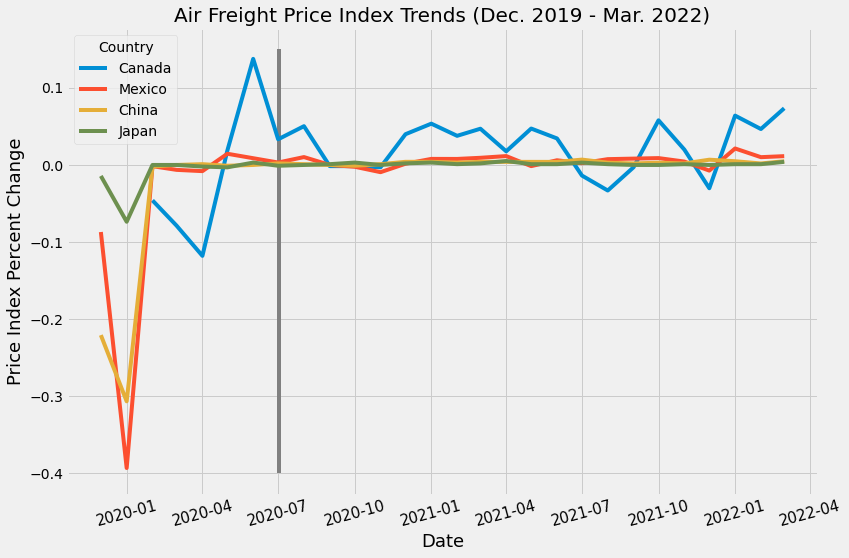

In [33]:
import seaborn as sns

fig = plt.figure(figsize=(12, 8))
sns.lineplot(x=pd.to_datetime(data['month']), y=data['pct_change'], hue=data['Country'])
g = plt.title("Air Freight Price Index Trends (Dec. 2019 - Mar. 2022)", fontsize=20)
g = plt.xticks(fontsize=15, rotation=15)
g = plt.xlabel("Date", fontsize=18)
g = plt.ylabel("Price Index Percent Change", fontsize=18)
g = plt.vlines(x=18445, ymin=-0.4, ymax=0.15, colors='grey')
plt.savefig('../images/pi_trends.png', dpi=300, bbox_inches='tight')

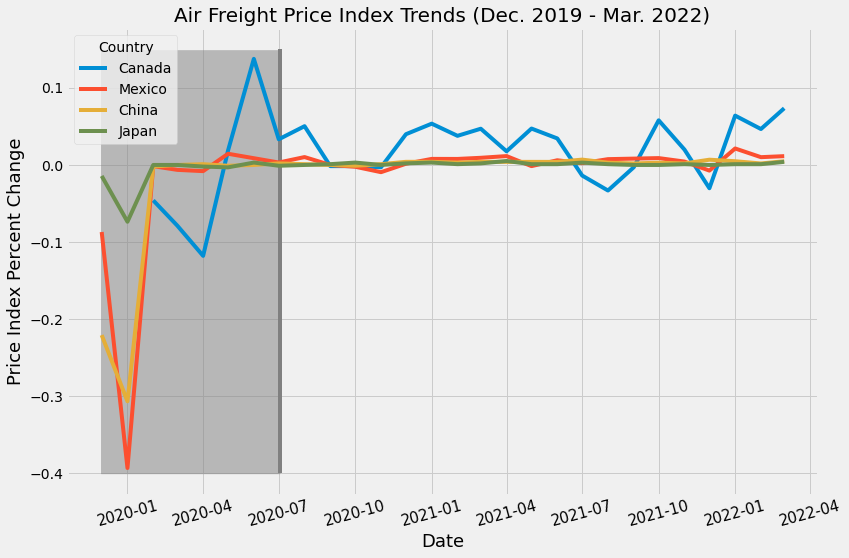

In [52]:
y = np.arange(-0.4, 0.15, 0.001)
x1 = [18230]*len(y)
x2 = [18445]*len(y)

fig = plt.figure(figsize=(12, 8))
sns.lineplot(x=pd.to_datetime(data['month']), y=data['pct_change'], hue=data['Country'])
g = plt.title("Air Freight Price Index Trends (Dec. 2019 - Mar. 2022)", fontsize=20)
g = plt.xticks(fontsize=15, rotation=15)
g = plt.xlabel("Date", fontsize=18)
g = plt.ylabel("Price Index Percent Change", fontsize=18)
g = plt.vlines(x=18445, ymin=-0.4, ymax=0.15, colors='grey')
g = plt.fill_betweenx(y = y, x1=x1, x2=x2, color='grey', alpha=0.5)
plt.savefig('../images/pi_shadow.png', dpi=300, bbox_inches='tight')

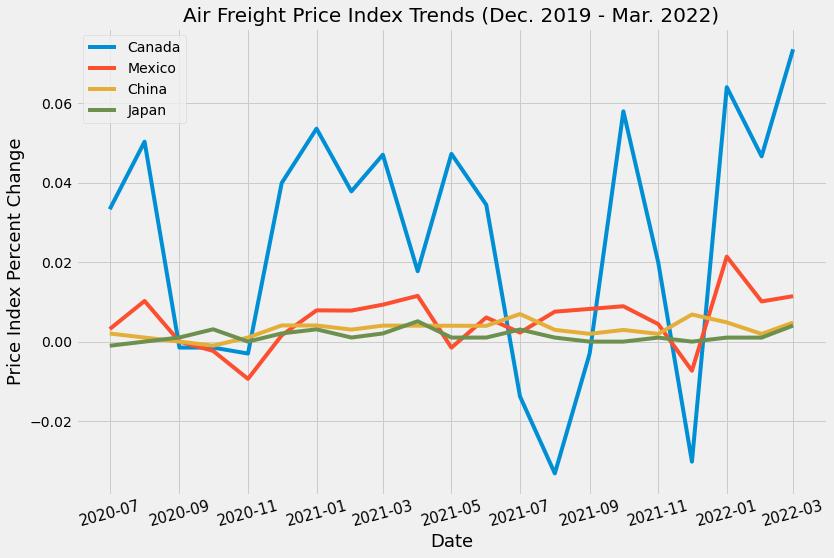

In [38]:
data_s = data[data['month'] >= '2020-07']

fig = plt.figure(figsize=(12, 8))
sns.lineplot(x=pd.to_datetime(data_s['month']), y=data_s['pct_change'], hue=data_s['Country'])
g = plt.title("Air Freight Price Index Trends (Dec. 2019 - Mar. 2022)", fontsize=20)
g = plt.xticks(fontsize=15, rotation=15)
g = plt.xlabel("Date", fontsize=18)
g = plt.ylabel("Price Index Percent Change", fontsize=18)
g = plt.legend(loc='upper left')
plt.savefig('../images/pi_trends_small.png', dpi=300, bbox_inches='tight')